# Parameterizations

> Joseph P. Vantassel, The University of Texas at Austin

This file is intended as a gallery for the types of `Parameterizations` that can be created with `swprepost`.

## Table of Contents

- [Parameter](#Parameter)
    - [Parameter()](#Parameter())
    - [from_fx()](#from_fx())
    - [from_ftl()](#from_ftl())
    - [from_ln()](#from_ln())
    - [from_lr()](#from_lr())
- [Parameterization](#Parameterization)
    - [Parameterization()](#Parameterization())
    - [from_min_max()](#from_min_max())
    - [to_param()](#to_param())
    - [from_param()](#from_param())

In [1]:
import swprepost
import numpy as np
import matplotlib.pyplot as plt

## Parameter

A `Parameter` is an object which defines a specific component of the layered earth model (e.g., Compression-wave velocity, Shear-wave Velocty, Poisson's Ratio (this is technically a condition and not a parameter, however from `swipp`'s perspective their is essentially no difference), and Mass Density). A `Parameter` has six basic parts defined for each layer, they are

1. Minimum depth/thickness,
2. Maximum depth/thickness,
3. Minimum value,
4. Maximum value, and
5. Existance of the reversal condition.

A `Parameter` must to be defined for `vp`, `vs`, `pr`, and `rh` to define a [Parameterization](#Parameterization), discussed below.

### Parameter()

Create a __Custom__ parameter.

[Back to Top](#Parameterizations)

In [2]:
lay_type = "thickness"  # Define each layer with thicknes rather than depth
lay_min = [1]*3         # Define 3 layers, each at least 1m thick.
lay_max = [10]*3        # Each layer is at most 10m thick.
par_min = [100]*3       # Minimum parameter for each layer is 100.
par_max = [300]*3       # Maximum parameter for each layer is 300.
par_rev = [False]*3     # No reversal is permitted. So the value of each layer must be greater than the previous. 

par = swprepost.Parameter(lay_min=lay_min, lay_max=lay_max, par_min=par_min, par_max=par_max, par_rev=par_rev, lay_type=lay_type)

print(par)              # View text representation.

Parameter(lay_min=[1, 1, 1], lay_max=[10, 10, 10], par_min=[100, 100, 100], par_max=[300, 300, 300], par_rev=[False, False, False], lay_type=CT)


### from_fx()

Create a __Fixed__ style parameter.

[Back to Top](#Parameterizations)

In [3]:
value = 2000           # Set parameter to 2000. Note it cannot change.

par = swprepost.Parameter.from_fx(value=value)

print(par)

Parameter(lay_min=[1824], lay_max=[1883], par_min=[2000.0], par_max=[2000.0], par_rev=[False], lay_type=FX)


### from_ftl()

Create a __Fixed-Thickness Layer__ style parameter.

[Back to Top](#Parameterizations)

In [4]:
nlayers = 10           # 10-layered profile.
thickness = 1          # Each layer is 1m thick, and cannot change.
par_min = 100          # Minimum value is 100.
par_max = 300          # Maximum value is 300.
par_rev = True         # Value can increase or decrease with depth.

par = swprepost.Parameter.from_ftl(nlayers=10, thickness=1, par_min=100, par_max=300, par_rev=True)

print(par)

Parameter(lay_min=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1], lay_max=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1], par_min=[100, 100, 100, 100, 100, 100, 100, 100, 100, 100], par_max=[300, 300, 300, 300, 300, 300, 300, 300, 300, 300], par_rev=[True, True, True, True, True, True, True, True, True, True], lay_type=FTL)


### from_ln()

Create a __Layering by Number__ style parameter. 

[Back to Top](#Parameterizations)

Parameter(lay_min=[0.6666666666666666, 0.6666666666666666, 0.6666666666666666], lay_max=[50.0, 50.0, 50.0], par_min=[120, 120, 120], par_max=[450, 450, 450], par_rev=[True, True, True], lay_type=LN)


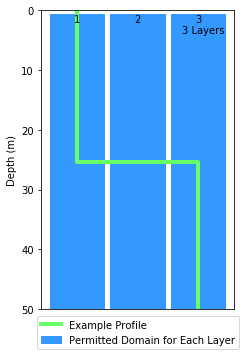

In [5]:
wmin = 2          # Minimum measured wavelength (used for minimum thickness calculation).
wmax = 100        # Maximum measured wavelength (used for maximum thickness calculation).
nlayers = 3       # Use 3 layers.
par_min = 120     # Each layer has a minimum value of 120.
par_max = 450     # Each layer has a maximum value of 450.
par_rev = True    # Each layer may increase or decrease relative to the layer above it.
depth_factor = 2  # Divide wmax by 2 to get the maximum allowable bottom depth of any parameter.

par = swprepost.Parameter.from_ln(wmin=wmin, wmax=wmax, nlayers=nlayers, par_min=par_min, par_max=par_max, par_rev=par_rev)

print(par)

par.plot()
plt.show()

### from_lr()

Create a __Layering Ratio__ style parameter.

[Back to Top](#Parameterizations)

Parameter(lay_min=[0.6666666666666666, 1.0, 4.0, 13.0, 50.0], lay_max=[1.0, 4.0, 13.0, 50.0, 51.0], par_min=[120, 120, 120, 120, 120], par_max=[450, 450, 450, 450, 450], par_rev=[True, True, True, True, True], lay_type=LR)


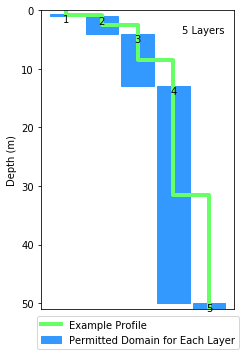

In [6]:
wmin = 2          # Minimum measured wavelength (used for minimum thickness calculation).
wmax = 100        # Maximum measured wavelength (used for maximum thickness calculation).
lr = 3.0          # Layering Ratio of 3.0.
par_min = 120     # Each layer has a minimum value of 120.
par_max = 450     # Each layer has a maximum value of 450.
par_rev = True    # Each layer may increase or decrease relative to the layer above it.
depth_factor = 2  # Divide wmax by 2 to get the maximum allowable bottom depth of any parameter.

par = swprepost.Parameter.from_lr(wmin=wmin, wmax=wmax, lr=lr, par_min=par_min, par_max=par_max, par_rev=par_rev)

print(par)

par.plot()
plt.show()

## Parameterization

A `Parameterization` is a collection of four [Parameter](#Parameter) objects. The four [Parameter](#Parameter) objects define the four components of the parameterization which are `vp`, `vs`, `pr`, and `rh`.

### Parameterization()

Create a __Custom__ parameterization.

[Back to Top](#Parameterizations)

In [7]:
wmin, wmax = 2, 20  # Define minimum and maximum wavelength
vp = swprepost.Parameter.from_ln(wmin=wmin, wmax=wmax, nlayers=3, par_min=200, par_max=600, par_rev=False, depth_factor=2)
pr = swprepost.Parameter.from_ln(wmin=wmin, wmax=wmax, nlayers=1, par_min=0.2, par_max=0.5, par_rev=False, depth_factor=2)
vs = swprepost.Parameter.from_lr(wmin=wmin, wmax=wmax, lr=2.0, par_min=100, par_max=350, par_rev=False, depth_factor=2)
rh = swprepost.Parameter.from_fx(2000)

param = swprepost.Parameterization(vp=vp, pr=pr, vs=vs, rh=rh)

print(param)

Parameterization(
vp=Parameter(lay_min=[0.6666666666666666, 0.6666666666666666, 0.6666666666666666], lay_max=[10.0, 10.0, 10.0], par_min=[200, 200, 200], par_max=[600, 600, 600], par_rev=[False, False, False], lay_type=LN),
pr=Parameter(lay_min=[0.6666666666666666], lay_max=[10.0], par_min=[0.2], par_max=[0.5], par_rev=[False], lay_type=LN),
vs=Parameter(lay_min=[0.6666666666666666, 1.0, 3.0, 10.0], lay_max=[1.0, 3.0, 10.0, 11.0], par_min=[100, 100, 100, 100], par_max=[350, 350, 350, 350], par_rev=[False, False, False, False], lay_type=LR),
rh=Parameter(lay_min=[1824], lay_max=[1883], par_min=[2000.0], par_max=[2000.0], par_rev=[False], lay_type=FX))


### from_min_max()

Create a `Parameterization` from short lists of input values.

_Note: This method compromises readability for pure charachter efficiency (which is almost always a bad idea!), however some users may find it useful for quick calculations._

[Back to Top](#Parameterizations)

In [8]:
wmin, wmax = 2, 20                   # Define minimum and maximum wavelength.
vp = ["LN", 3, 200, 600, False]      # Exactly the same as previous example.
pr = ["LN", 1, 0.2, 0.5, False]      # Exactly the same as previous example.
vs = ["LR", 2.0, 100, 350, False]    # Exactly the same as previous example.
rh = ["FX", 2000]                    # Exactly the same as previous example.

param = swprepost.Parameterization.from_min_max(vp=vp, pr=pr, vs=vs, rh=rh, wv=(wmin, wmax), factor=2)

print(param)

Parameterization(
vp=Parameter(lay_min=[0.6666666666666666, 0.6666666666666666, 0.6666666666666666], lay_max=[10.0, 10.0, 10.0], par_min=[200, 200, 200], par_max=[600, 600, 600], par_rev=[False, False, False], lay_type=LN),
pr=Parameter(lay_min=[0.6666666666666666], lay_max=[10.0], par_min=[0.2], par_max=[0.5], par_rev=[False], lay_type=LN),
vs=Parameter(lay_min=[0.6666666666666666, 1.0, 3.0, 10.0], lay_max=[1.0, 3.0, 10.0, 11.0], par_min=[100, 100, 100, 100], par_max=[350, 350, 350, 350], par_rev=[False, False, False, False], lay_type=LR),
rh=Parameter(lay_min=[1824], lay_max=[1883], par_min=[2000.0], par_max=[2000.0], par_rev=[False], lay_type=FX))


### to_param()

Write a `Parameterization` object to the `.param` format which can be imported into Dinver.

[Back to Top](#Parameterizations)

In [9]:
# Create an example parameterization
wmin, wmax = 2, 20
vp = swprepost.Parameter.from_ln(wmin=wmin, wmax=wmax, nlayers=3, par_min=200, par_max=600, par_rev=False, depth_factor=2)
pr = swprepost.Parameter.from_ln(wmin=wmin, wmax=wmax, nlayers=1, par_min=0.2, par_max=0.5, par_rev=False, depth_factor=2)
vs = swprepost.Parameter.from_lr(wmin=wmin, wmax=wmax, lr=2.0, par_min=100, par_max=350, par_rev=False, depth_factor=2)
rh = swprepost.Parameter.from_fx(2000)
param = swprepost.Parameterization(vp=vp, pr=pr, vs=vs, rh=rh)

# Write parameterization to .param format
param.to_param(fname_prefix="to_param_v2", version="2")   # Write param using v2 style
param.to_param(fname_prefix="to_param_v3", version="3")   # Write param using v3 style

### from_param()

Create a `Parameterization` from an existing `.param` file.

_Note: This method is experimental and may not work for all .param files._

[Back to Top](#Parameterizations)

In [10]:
new_param = swprepost.Parameterization.from_param(fname_prefix="to_param_v2")

print(f"Does `new_param` equal `param`? Python says: {param==new_param}")

Does `new_param` equal `param`? Python says: True
